In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Orbit data

In [5]:
PATH_TO_DATA = '../../Bmad/Playground/production/bin/'

## Helper

In [8]:
def plot_phase_space(df,s=False):
    '''
    @param df: dataframe with 5/7 columns (turn, spatial coordinates, momentum space coordinates)
    @param axes: axes object
    '''
    df_start = df[df.iloc[:,0] == 0]
    df_end = df[df.iloc[:,0] != 0]
    
    if len(df.columns) == 5:
        fig, axes = plt.subplots(1,2, figsize=(15,5),sharex=True)
        
        df_start.plot(x = 'x',
                      y = 'xp', 
                      kind = 'scatter',
                      ax = axes[0],
                      c = 'r'
                     )
    
        df_end.plot(x = 'x',
                    y = 'xp', 
                    kind = 'scatter',
                    ax = axes[0]
                   )
        
        df_start.plot(x = 'y',
                      y = 'yp', 
                      kind = 'scatter',
                      ax = axes[1],
                      c = 'r'
                     )
    
        df_end.plot(x = 'y',
                    y = 'yp', 
                    kind = 'scatter',
                    ax = axes[1]
                   )
        
        
        
    elif len(df.columns) == 7:
        rows = df['element'].nunique()-1 #drop beginning element
        fig, axes = plt.subplots(rows+1,2, figsize=(15,25),sharex=True)        
        ax = plt.subplot2grid((rows+1,2),(rows,0), colspan = 2)
        eles = df['element'].unique()
        eles = eles[1:] #drop beginning element
        
        
        
        df_xmax = df_start[df_start['x'] == df_start['x'].max()]
        df_ymax = df_start[df_start['y'] == df_start['y'].max()]
        
        for i,ele in enumerate(eles):
            df_end_ele = df_end[df_end['element']==ele]
            
            df_start.plot(x = 'x',
                          y = 'xp', 
                          kind = 'scatter',
                          ax = axes[i][0],
                          c = 'r'
                         )
    
            df_end_ele.plot(x = 'x',
                        y = 'xp', 
                        kind = 'scatter',
                        ax = axes[i][0]
                       )
        
            df_start.plot(x = 'y',
                          y = 'yp', 
                          kind = 'scatter',
                          ax = axes[i][1],
                          c = 'r'
                         )
    
            df_end_ele.plot(x = 'y',
                        y = 'yp', 
                        kind = 'scatter',
                        ax = axes[i][1]
                       )
            
            axes[i][0].legend(['start','end'])
            axes[i][0].text(0.1,0.9,ele + ' s = {}'.format(df_end_ele['s'].drop_duplicates().tolist()[0]),transform=axes[i][0].transAxes)
            
            df_xmax = df_xmax.append(df_end_ele[df_end_ele['x'] == df_end_ele['x'].max()])
            df_ymax = df_ymax.append(df_end_ele[df_end_ele['y'] == df_end_ele['y'].max()])
            
            
        df_xmax.plot(x = 's',
                     y = 'x',
                     ax = ax,
                     marker = 'o',
                     c = 'g'
                    )
        
        df_ymax.plot(x = 's',
                     y = 'y',
                     ax = ax,
                     marker = 'o',
                     c = 'm'
                    )
        
        # print initial ellipse size
        print('xmax @  start:', df_xmax[df_xmax['s']==0]['x'].iloc[0])
        print('xmax @  end:', df_xmax[df_xmax['s']==df_xmax['s'].max()]['x'].iloc[0])
        print('ymax @  start:', df_ymax[df_ymax['s']==0]['y'].iloc[0])
        print('ymax @  end:', df_ymax[df_ymax['s']==df_ymax['s'].max()]['y'].iloc[0])
    if s:    
        plt.savefig('/home/marius/Jülich/Bmad/Playground/Distance_to_Diverge/tracking.png', format='png', dpi = 300)
     
    return axes

#TODO: restructure, drop start emittance representation in each plot, take red + blue for x,y. plot enevelope
# RMS value more meaningful?

## plot Phase space

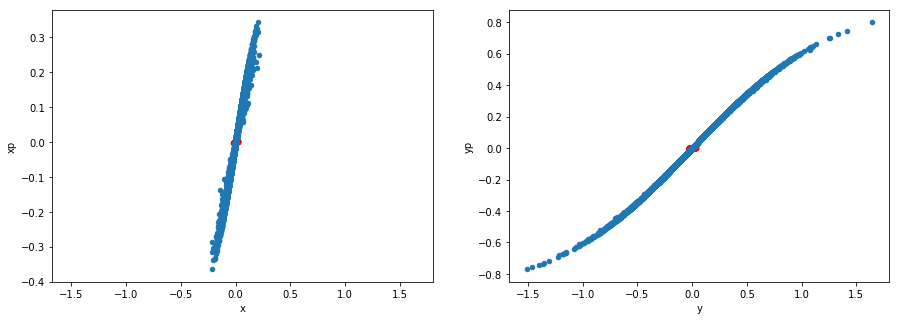

In [5]:
df_xy = pd.read_table(PATH_TO_DATA + 'tracking.txt',
                     sep='\s+',
                     header=None,
                     names=['turn','x','xp','y','yp'],
                     usecols=[1,2,3,4,5]
                    )

plot_phase_space(df_xy)


xmax @  start: 0.019822675559546376
xmax @  end: 0.02226401143042232
ymax @  start: 0.03226760626562391
ymax @  end: 0.034249867616718326


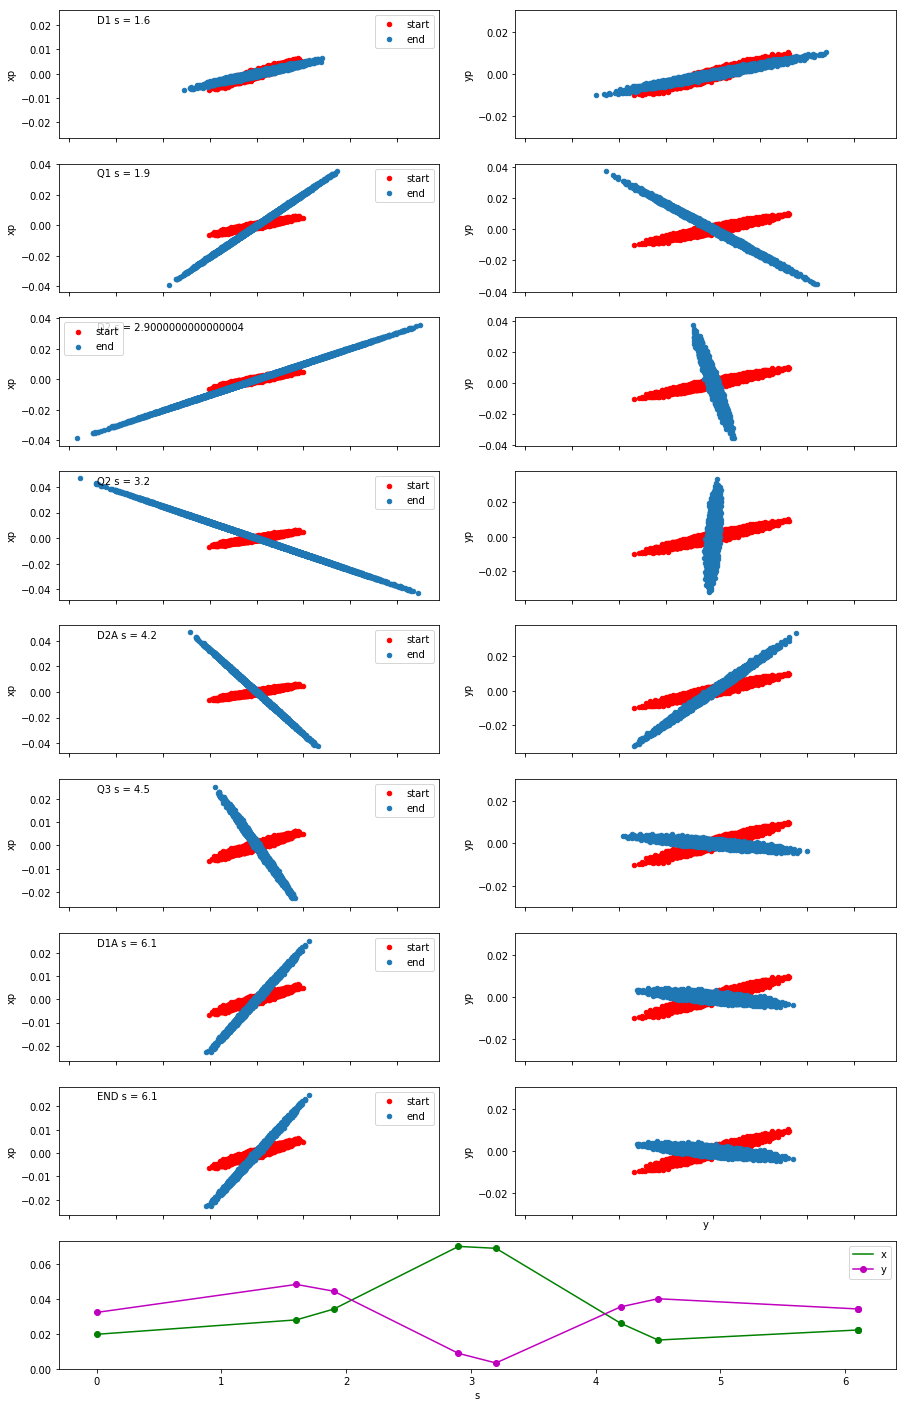

In [11]:
df_ele=pd.read_table(PATH_TO_DATA + 'tracking_ele.txt',
                     sep='\s+',
                     header=None,
                     names=['turn','element','s','x','xp','y','yp'],
                     usecols=[1,2,3,4,5,6,7]
                    )
ax = plot_phase_space(df_ele,True)
plt.show()
#TODO: add x axis to emittance plots

In [18]:
df_start = df_ele[df_ele['turn'] == 0]
df_start.groupby('s').agg({'x':'std'}).reset_index()

,s,x
0,0.0,0.005745


In [21]:
df_start['x'].std()

0.0057448497999011035